# 02 – Model Training

In this notebook, we train the MLPClassifier model using the PyTorch training loop defined in `train.py`.

We will:
- Load preprocessed data
- Create datasets and dataloaders
- Instantiate the model
- Define loss function and optimizer
- Train the model for 20 epochs
- Save the best model based on validation accuracy


In [2]:
import sys
import os

# Adiciona a pasta 'src/' ao path
sys.path.append(os.path.abspath("../src"))

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from model import MLPClassifier
from train import train_model
from data_loader import HumanActivityDataset

import pickle
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Device:", device)


✅ Device: cpu


## Load processed data

We load the preprocessed NumPy arrays saved at the end of the `01_exploration.ipynb` notebook.


In [3]:
with open("../data/processed_data.pkl", "rb") as f:
    X_train_final, y_train_final, X_val, y_val, X_test_scaled, y_test_encoded = pickle.load(f)


In [4]:
BATCH_SIZE = 64

train_dataset = HumanActivityDataset(X_train_final, y_train_final)
val_dataset = HumanActivityDataset(X_val, y_val)
test_dataset = HumanActivityDataset(X_test_scaled, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


## Define MLP architecture

We will use:
- 561 input features
- Two hidden layers: 256 and 128 neurons
- ReLU activation
- Dropout (0.3)
- Output layer with 6 classes


In [5]:
model = MLPClassifier(
    input_dim=561,
    hidden_dims=[256, 128],
    output_dim=6,
    dropout_rate=0.3
).to(device)

print(model)


MLPClassifier(
  (model): Sequential(
    (0): Linear(in_features=561, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=6, bias=True)
  )
)


## Define loss function and optimizer

We use:
- CrossEntropyLoss (for multi-class classification)
- Adam optimizer with learning rate = 0.001


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
print("Type of criterion:", type(criterion))
print("Type of optimizer:", type(optimizer))


Type of criterion: <class 'torch.nn.modules.loss.CrossEntropyLoss'>
Type of optimizer: <class 'torch.optim.adam.Adam'>


## Train the model

We will train for 20 epochs and save the best model based on validation accuracy.


In [9]:
import os

# Cria a pasta ../outputs se não existir
os.makedirs("../outputs", exist_ok=True)


In [ ]:
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    epochs=20,
    save_path="../outputs/best_model.pth"
)



Epoch 1/20


Train Loss: 0.1523 | Train Acc: 0.9454
Val   Loss: 0.0983 | Val   Acc: 0.9613
✅ Saved new best model to ../outputs/best_model.pth

Epoch 2/20


Train Loss: 0.0908 | Train Acc: 0.9663
Val   Loss: 0.0762 | Val   Acc: 0.9714
✅ Saved new best model to ../outputs/best_model.pth

Epoch 3/20


Train Loss: 0.0853 | Train Acc: 0.9702
Val   Loss: 0.0606 | Val   Acc: 0.9762
✅ Saved new best model to ../outputs/best_model.pth

Epoch 4/20


Train Loss: 0.0636 | Train Acc: 0.9765
Val   Loss: 0.0567 | Val   Acc: 0.9769
✅ Saved new best model to ../outputs/best_model.pth

Epoch 5/20


Train Loss: 0.0630 | Train Acc: 0.9774
Val   Loss: 0.0568 | Val   Acc: 0.9782
✅ Saved new best model to ../outputs/best_model.pth

Epoch 6/20


Train Loss: 0.0569 | Train Acc: 0.9782
Val   Loss: 0.0591 | Val   Acc: 0.9748

Epoch 7/20


Train Loss: 0.0477 | Train Acc: 0.9818
Val   Loss: 0.0887 | Val   Acc: 0.9653

Epoch 8/20


Train Loss: 0.0696 | Train Acc: 0.9750
Val   Loss: 0.0782 | Val   Acc: 0.9667

Epoch 9/20


Train Loss: 0.0499 | Train Acc: 0.9820
Val   Loss: 0.0462 | Val   Acc: 0.9844
✅ Saved new best model to ../outputs/best_model.pth

Epoch 10/20


Train Loss: 0.0404 | Train Acc: 0.9845
Val   Loss: 0.0510 | Val   Acc: 0.9803

Epoch 11/20


Train Loss: 0.0375 | Train Acc: 0.9855
Val   Loss: 0.0480 | Val   Acc: 0.9789

Epoch 12/20


Train Loss: 0.0320 | Train Acc: 0.9871
Val   Loss: 0.0566 | Val   Acc: 0.9803

Epoch 13/20


Train Loss: 0.0326 | Train Acc: 0.9874
Val   Loss: 0.0513 | Val   Acc: 0.9789

Epoch 14/20


Train Loss: 0.0391 | Train Acc: 0.9881
Val   Loss: 0.0475 | Val   Acc: 0.9816

Epoch 15/20


Train Loss: 0.0394 | Train Acc: 0.9845
Val   Loss: 0.0505 | Val   Acc: 0.9816

Epoch 16/20


Train Loss: 0.0350 | Train Acc: 0.9874
Val   Loss: 0.0504 | Val   Acc: 0.9796

Epoch 17/20


Train Loss: 0.0234 | Train Acc: 0.9917
Val   Loss: 0.0470 | Val   Acc: 0.9864
✅ Saved new best model to ../outputs/best_model.pth

Epoch 18/20


Train Loss: 0.0163 | Train Acc: 0.9942
Val   Loss: 0.0376 | Val   Acc: 0.9871
✅ Saved new best model to ../outputs/best_model.pth

Epoch 19/20


Train Loss: 0.0178 | Train Acc: 0.9925
Val   Loss: 0.0587 | Val   Acc: 0.9823

Epoch 20/20


Train Loss: 0.0305 | Train Acc: 0.9898
Val   Loss: 0.0465 | Val   Acc: 0.9857


## Visualize training and validation metrics


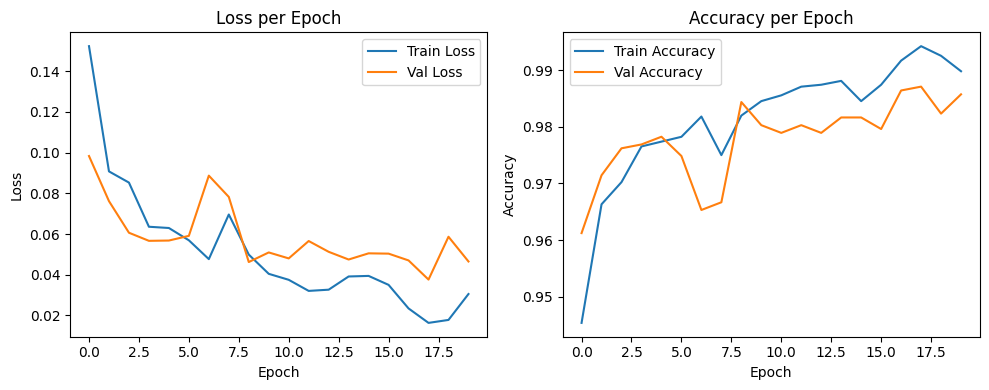

In [ ]:
plt.figure(figsize=(10, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Summary

The model has been trained successfully and the best version was saved to:

📁 `../outputs/best_model.pth`

In the next notebook, we will evaluate the model on the test set using:
- Accuracy
- Confusion Matrix
- Classification Report
